In [1]:
import keras
from keras.models import load_model
#from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Flatten, Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
import os
import pickle
import numpy as np
import h5py
from keras import backend as K
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
import pandas as pd
from PIL import Image

Using TensorFlow backend.


In [2]:
input_img = Input(shape=(2048, 2048, 3))
x = Conv2D(4, (7, 7), padding='same')(input_img)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (5, 5), padding='same')(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), padding='same')(encoded)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (5, 5), padding='same')(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (7, 7), padding='same')(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
#x = BatchNormalization()(x)
decoded = Activation('relu')(x)
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2048, 2048, 3)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2048, 2048, 4)     592       
_________________________________________________________________
activation_1 (Activation)    (None, 2048, 2048, 4)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1024, 1024, 4)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1024, 1024, 8)     808       
_________________________________________________________________
activation_2 (Activation)    (None, 1024, 1024, 8)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 512, 512, 8)       0         
__________

In [3]:
model.load_weights('/mnt/Doc/weight/Autoencoder/256/best_weight_0507.h5')

In [12]:

blunc=np.emptylunc=np.empty((1, 2048, 2048, 3), np.float32)
path = "/mnt/Doc/2048pix_tissue_all/TRU/TCGA-50-5935-01A-01-TS1_2048_files/8_15.jpeg"
path1 = "/mnt/Doc/2048pix_tissue_all/PP/TCGA-78-7160-01A-01-TS1_2048_files/6_5.jpeg"
img_src = Image.open(path) #image open

cut_temp=np.asarray(img_src)
img_temp=cut_temp/255.0
blunc[0] = img_temp



In [13]:
decoded_imgs=model.predict(blunc)

In [8]:
import matplotlib.pyplot as plt
import random

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


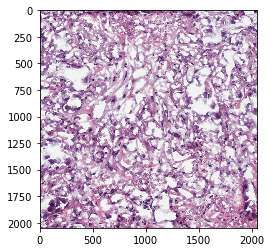

In [14]:
decoded_imgs.astype('uint8')
plt.imshow(decoded_imgs[0])